In [160]:
from jmetal.algorithm.multiobjective import NSGAII
from jmetal.operator.crossover import SBXCrossover
from jmetal.operator.mutation import PolynomialMutation
from jmetal.problem import Fonseca
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.util.solution import get_non_dominated_solutions, print_function_values_to_file
from jmetal.core.quality_indicator import NormalizedHyperVolume, InvertedGenerationalDistance
import time
import numpy as np

problem = Fonseca()

algorithm = NSGAII(
    problem=problem,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    termination_criterion=StoppingByEvaluations(max_evaluations=10000)
)

algorithm.start_computing_time = time.time()
algorithm.solutions = algorithm.create_initial_solutions()
algorithm.solutions = algorithm.evaluate(algorithm.solutions)
algorithm.init_progress()

ref_front = np.loadtxt("reference_fronts/Fonseca.pf")
hv_ref_point = np.max(ref_front, axis=0) + 0.1

i = 0
while not algorithm.stopping_condition_is_met():
    i += 1
    print('Iteration: ' + str(i))
    algorithm.step()
    algorithm.update_progress()
    
    result = algorithm.result()
    front = get_non_dominated_solutions(algorithm.result())
    front_values = np.array([s.objectives for s in front])

    nhv = NormalizedHyperVolume(hv_ref_point, ref_front)
    igd = InvertedGenerationalDistance(ref_front)
    print(f'nHV = {nhv.compute(front_values)}')
    print(f'IGD = {igd.compute(front_values)}')
    
    if (i == 1 or i == 5 or i == 10 or i == 50):
        print_function_values_to_file(front, f'results/FUN.NSGAII.Fonseca.{i}')

algorithm.total_computing_time = time.time() - algorithm.start_computing_time

[2025-10-02 11:26:00,182] [jmetal.util.solution] [INFO] Output file (function values): results/FUN.NSGAII.Fonseca.1


Iteration: 1
nHV = 0.7476525242915234
IGD = 0.285002281311341
Iteration: 2
nHV = 0.6227850578022791
IGD = 0.1902780096296622
Iteration: 3


[2025-10-02 11:26:00,502] [jmetal.util.solution] [INFO] Output file (function values): results/FUN.NSGAII.Fonseca.5


nHV = 0.506786944069973
IGD = 0.15028548965791788
Iteration: 4
nHV = 0.3749936522451459
IGD = 0.09863823258284957
Iteration: 5
nHV = 0.25384270874537906
IGD = 0.06447544583112567
Iteration: 6
nHV = 0.18436832149611526
IGD = 0.048765922940610024
Iteration: 7
nHV = 0.14010816204424792
IGD = 0.03809469717051635
Iteration: 8
nHV = 0.11255114876994932
IGD = 0.029419653524855094
Iteration: 9


[2025-10-02 11:26:00,969] [jmetal.util.solution] [INFO] Output file (function values): results/FUN.NSGAII.Fonseca.10


nHV = 0.09154857925110227
IGD = 0.02578509704003237
Iteration: 10
nHV = 0.0757659965124915
IGD = 0.021199820393124628
Iteration: 11
nHV = 0.06177736502910369
IGD = 0.0177511400354957
Iteration: 12
nHV = 0.05428467230900913
IGD = 0.016184824167013903
Iteration: 13
nHV = 0.04711458334798424
IGD = 0.013998623518013483
Iteration: 14
nHV = 0.04331735480669363
IGD = 0.012897451510455593
Iteration: 15
nHV = 0.03960109190900696
IGD = 0.012141742794337017
Iteration: 16
nHV = 0.03648655727947059
IGD = 0.011406390295338081
Iteration: 17
nHV = 0.03508047631989408
IGD = 0.010755466673771408
Iteration: 18
nHV = 0.033572074975683486
IGD = 0.010473263436733181
Iteration: 19
nHV = 0.032205571177375214
IGD = 0.01002083770106451
Iteration: 20
nHV = 0.03162105216469835
IGD = 0.0098955696014228
Iteration: 21
nHV = 0.0304833295261423
IGD = 0.009537627198424626
Iteration: 22
nHV = 0.029693581856370055
IGD = 0.009407217973514174
Iteration: 23
nHV = 0.028066543100648933
IGD = 0.008856169136641844
Iteration: 24

[2025-10-02 11:26:04,758] [jmetal.util.solution] [INFO] Output file (function values): results/FUN.NSGAII.Fonseca.50


nHV = 0.015511886448516199
IGD = 0.005549355044631734
Iteration: 49
nHV = 0.01610841833405241
IGD = 0.005684014292311516
Iteration: 50
nHV = 0.015453528486266355
IGD = 0.005556922497035333
Iteration: 51
nHV = 0.0158301902523309
IGD = 0.005695851408107662
Iteration: 52
nHV = 0.015442721566955475
IGD = 0.005708621136058877
Iteration: 53
nHV = 0.01552847831150983
IGD = 0.005645907920163952
Iteration: 54
nHV = 0.015785498903096884
IGD = 0.005669453987802274
Iteration: 55
nHV = 0.015666987306169222
IGD = 0.005690692074676929
Iteration: 56
nHV = 0.015608844457709381
IGD = 0.005637829009919309
Iteration: 57
nHV = 0.015651234232165745
IGD = 0.005585245486712113
Iteration: 58
nHV = 0.01589368054427831
IGD = 0.005661444819932706
Iteration: 59
nHV = 0.015715973100769776
IGD = 0.00565140647924714
Iteration: 60
nHV = 0.015452750797668724
IGD = 0.005489267901372134
Iteration: 61
nHV = 0.015358908955881767
IGD = 0.005513416972309543
Iteration: 62
nHV = 0.015613741677864779
IGD = 0.005692103095681581


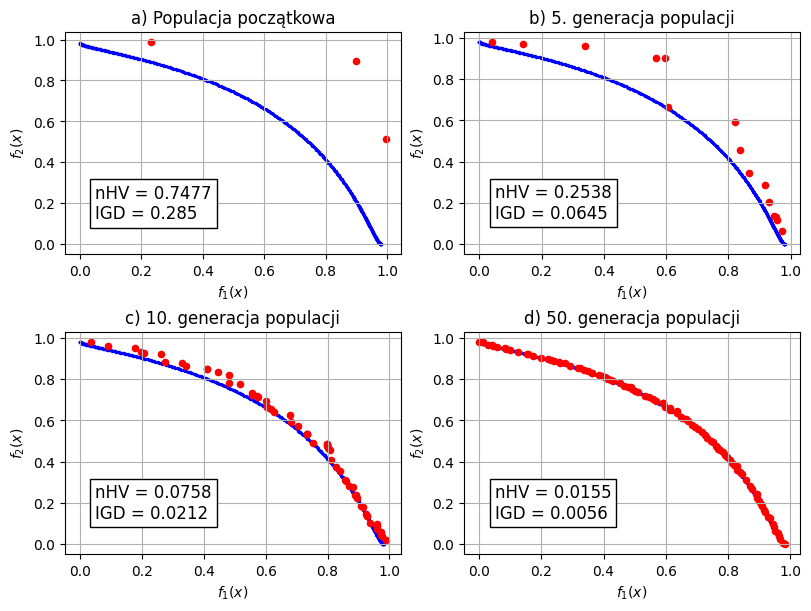

In [180]:
import numpy as np
import matplotlib.pyplot as plt

ref = np.loadtxt("reference_fronts/Fonseca.pf")
ref_x = ref[:, 0]
ref_y = ref[:, 1]

hv_ref_point = np.max(ref, axis=0) + 0.1
nhv = NormalizedHyperVolume(hv_ref_point, ref_front)
igd = InvertedGenerationalDistance(ref_front)

fun1 = np.loadtxt("results/FUN.NSGAII.Fonseca.1")
fun1_x = fun1[:, 0]
fun1_y = fun1[:, 1]
fun1_nhv = nhv.compute(fun1)
fun1_igd = igd.compute(fun1)

fun5 = np.loadtxt("results/FUN.NSGAII.Fonseca.5")
fun5_x = fun5[:, 0]
fun5_y = fun5[:, 1]
fun5_nhv = nhv.compute(fun5)
fun5_igd = igd.compute(fun5)

fun10 = np.loadtxt("results/FUN.NSGAII.Fonseca.10")
fun10_x = fun10[:, 0]
fun10_y = fun10[:, 1]
fun10_nhv = nhv.compute(fun10)
fun10_igd = igd.compute(fun10)

fun50 = np.loadtxt("results/FUN.NSGAII.Fonseca.50")
fun50_x = fun50[:, 0]
fun50_y = fun50[:, 1]
fun50_nhv = nhv.compute(fun50)
fun50_igd = igd.compute(fun50)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), constrained_layout=True)
bbox_props = dict(boxstyle='square', facecolor='w', alpha=1)
ref_s = 2
fun_s = 20
ndigits = 4
legend_h = 0.05
legend_v = 0.2
# fig.suptitle("Pareto front approximation (NSGAII-Fonseca)", fontsize="x-large")
plt.subplot(221) # (rows-columns-index)
plt.xlabel("$f_1{(x)}$")
plt.ylabel("$f_2{(x)}$")
plt.grid(True)
plt.scatter(ref_x, ref_y, marker="o", facecolors='blue', s=ref_s)
plt.scatter(fun1_x, fun1_y, marker="o", facecolors='red', s=fun_s)
plt.title('a) Populacja początkowa')
plt.text(legend_h, legend_v, f'nHV = {round(fun1_nhv, ndigits)}\nIGD = {round(fun1_igd, ndigits)}', ha='left', va='center', size=12, bbox=bbox_props)

plt.subplot(222)
plt.xlabel("$f_1{(x)}$")
plt.ylabel("$f_2{(x)}$")
plt.grid(True)
plt.scatter(ref_x, ref_y, marker="o", facecolors='blue', s=ref_s)
plt.scatter(fun5_x, fun5_y, marker="o", facecolors='red', s=fun_s)
plt.title('b) 5. generacja populacji')
plt.text(legend_h, legend_v, f'nHV = {round(fun5_nhv, ndigits)}\nIGD = {round(fun5_igd, ndigits)}', ha='left', va='center', size=12, bbox=bbox_props)

plt.subplot(223)
plt.xlabel("$f_1{(x)}$")
plt.ylabel("$f_2{(x)}$")
plt.grid(True)
plt.scatter(ref_x, ref_y, marker="o", facecolors='blue', s=ref_s)
plt.scatter(fun10_x, fun10_y, marker="o", facecolors='red', s=fun_s)
plt.title('c) 10. generacja populacji')
plt.text(legend_h, legend_v, f'nHV = {round(fun10_nhv, ndigits)}\nIGD = {round(fun10_igd, ndigits)}', ha='left', va='center', size=12, bbox=bbox_props)


plt.subplot(224)
plt.xlabel("$f_1{(x)}$")
plt.ylabel("$f_2{(x)}$")
plt.grid(True)
plt.scatter(ref_x, ref_y, marker="o", facecolors='blue', s=ref_s)
plt.scatter(fun50_x, fun50_y, marker="o", facecolors='red', s=fun_s)
plt.title('d) 50. generacja populacji')
plt.text(legend_h, legend_v, f'nHV = {round(fun50_nhv, ndigits)}\nIGD = {round(fun50_igd, ndigits)}', ha='left', va='center', size=12, bbox=bbox_props)

fig.savefig('img/nsgaII_fonseca.png')
plt.show()